In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

#Importing Dataset

[src](https://www.kaggle.com/datasets/saurabhbadole/leading-indian-bank-and-cibil-real-world-dataset)

In [ ]:
df=pd.read_csv('/content/final_dataset.csv', encoding='utf-8')

print("Shape")
df.shape

print("----")

print("Info")
df.info()

Shape
----
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51338 entries, 0 to 51337
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PROSPECTID                 51336 non-null  float64
 1   time_since_recent_payment  51338 non-null  int64  
 2   num_times_delinquent       51337 non-null  float64
 3   max_recent_level_of_deliq  51337 non-null  float64
 4   num_std                    51337 non-null  float64
 5   num_sub                    51337 non-null  float64
 6   num_dbt                    51337 non-null  float64
 7   num_lss                    51337 non-null  float64
 8   recent_level_of_deliq      51337 non-null  float64
 9   tot_enq                    51337 non-null  float64
 10  CC_enq                     51337 non-null  float64
 11  PL_enq                     51337 non-null  float64
 12  time_since_recent_enq      51337 non-null  float64
 13  MARITALSTATUS              513

In [ ]:
df=pd.read_csv('/content/final_dataset.csv', encoding='utf-8')

print("Shape")
df.shape

print("----")

print("Info")
df.info()

Shape
----
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51338 entries, 0 to 51337
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PROSPECTID                 51336 non-null  float64
 1   time_since_recent_payment  51338 non-null  int64  
 2   num_times_delinquent       51337 non-null  float64
 3   max_recent_level_of_deliq  51337 non-null  float64
 4   num_std                    51337 non-null  float64
 5   num_sub                    51337 non-null  float64
 6   num_dbt                    51337 non-null  float64
 7   num_lss                    51337 non-null  float64
 8   recent_level_of_deliq      51337 non-null  float64
 9   tot_enq                    51337 non-null  float64
 10  CC_enq                     51337 non-null  float64
 11  PL_enq                     51337 non-null  float64
 12  time_since_recent_enq      51337 non-null  float64
 13  MARITALSTATUS              513

In [ ]:
df.replace(-99999, np.nan, inplace=True)  # Replace -99999 with NaN
df.dropna(inplace=True)
df.shape

(42066, 29)

# Normalizing the Dataset

```
Ai = (Ai)-mean/standard deviation
```

In [ ]:
# Custom priority mapping for 'Approved_Flag' before normalization
priority_mapping = {
    'P1': 1.0,       # Highest priority
    'P2': 0.666667,
    'P3': 0.333333,
    'P4': 0.0        # Lowest priority
}

df['Approved_Flag'] = df['Approved_Flag'].map(priority_mapping)

# Encode the other categorical columns as numerical codes
categorical_columns = df.select_dtypes(include=['object', 'string']).columns
for col in categorical_columns:
    if col != 'Approved_Flag':
        df[col] = pd.Categorical(df[col]).codes

# Normalize the DataFrame (only numerical columns will be scaled)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the normalized DataFrame
print("Normalized DataFrame:")
print(df_normalized.head())

Normalized DataFrame:
   PROSPECTID  time_since_recent_payment  num_times_delinquent  \
0    0.000000                   0.090219              0.148649   
1    0.000019                   0.007422              0.000000   
2    0.000039                   0.049480              0.121622   
3    0.000078                   0.095827              0.000000   
4    0.000097                   0.040079              0.189189   

   max_recent_level_of_deliq   num_std   num_sub  num_dbt  num_lss  \
0                   0.032222  0.049763  0.000000      0.0      0.0   
1                   0.000000  0.000000  0.000000      0.0      0.0   
2                   0.027778  0.023697  0.000000      0.0      0.0   
3                   0.000000  0.125592  0.000000      0.0      0.0   
4                   0.300000  0.011848  0.073171      0.0      0.0   

   recent_level_of_deliq   tot_enq  ...  pct_of_active_TLs_ever  \
0               0.032222  0.028571  ...                   0.200   
1               0.000000  

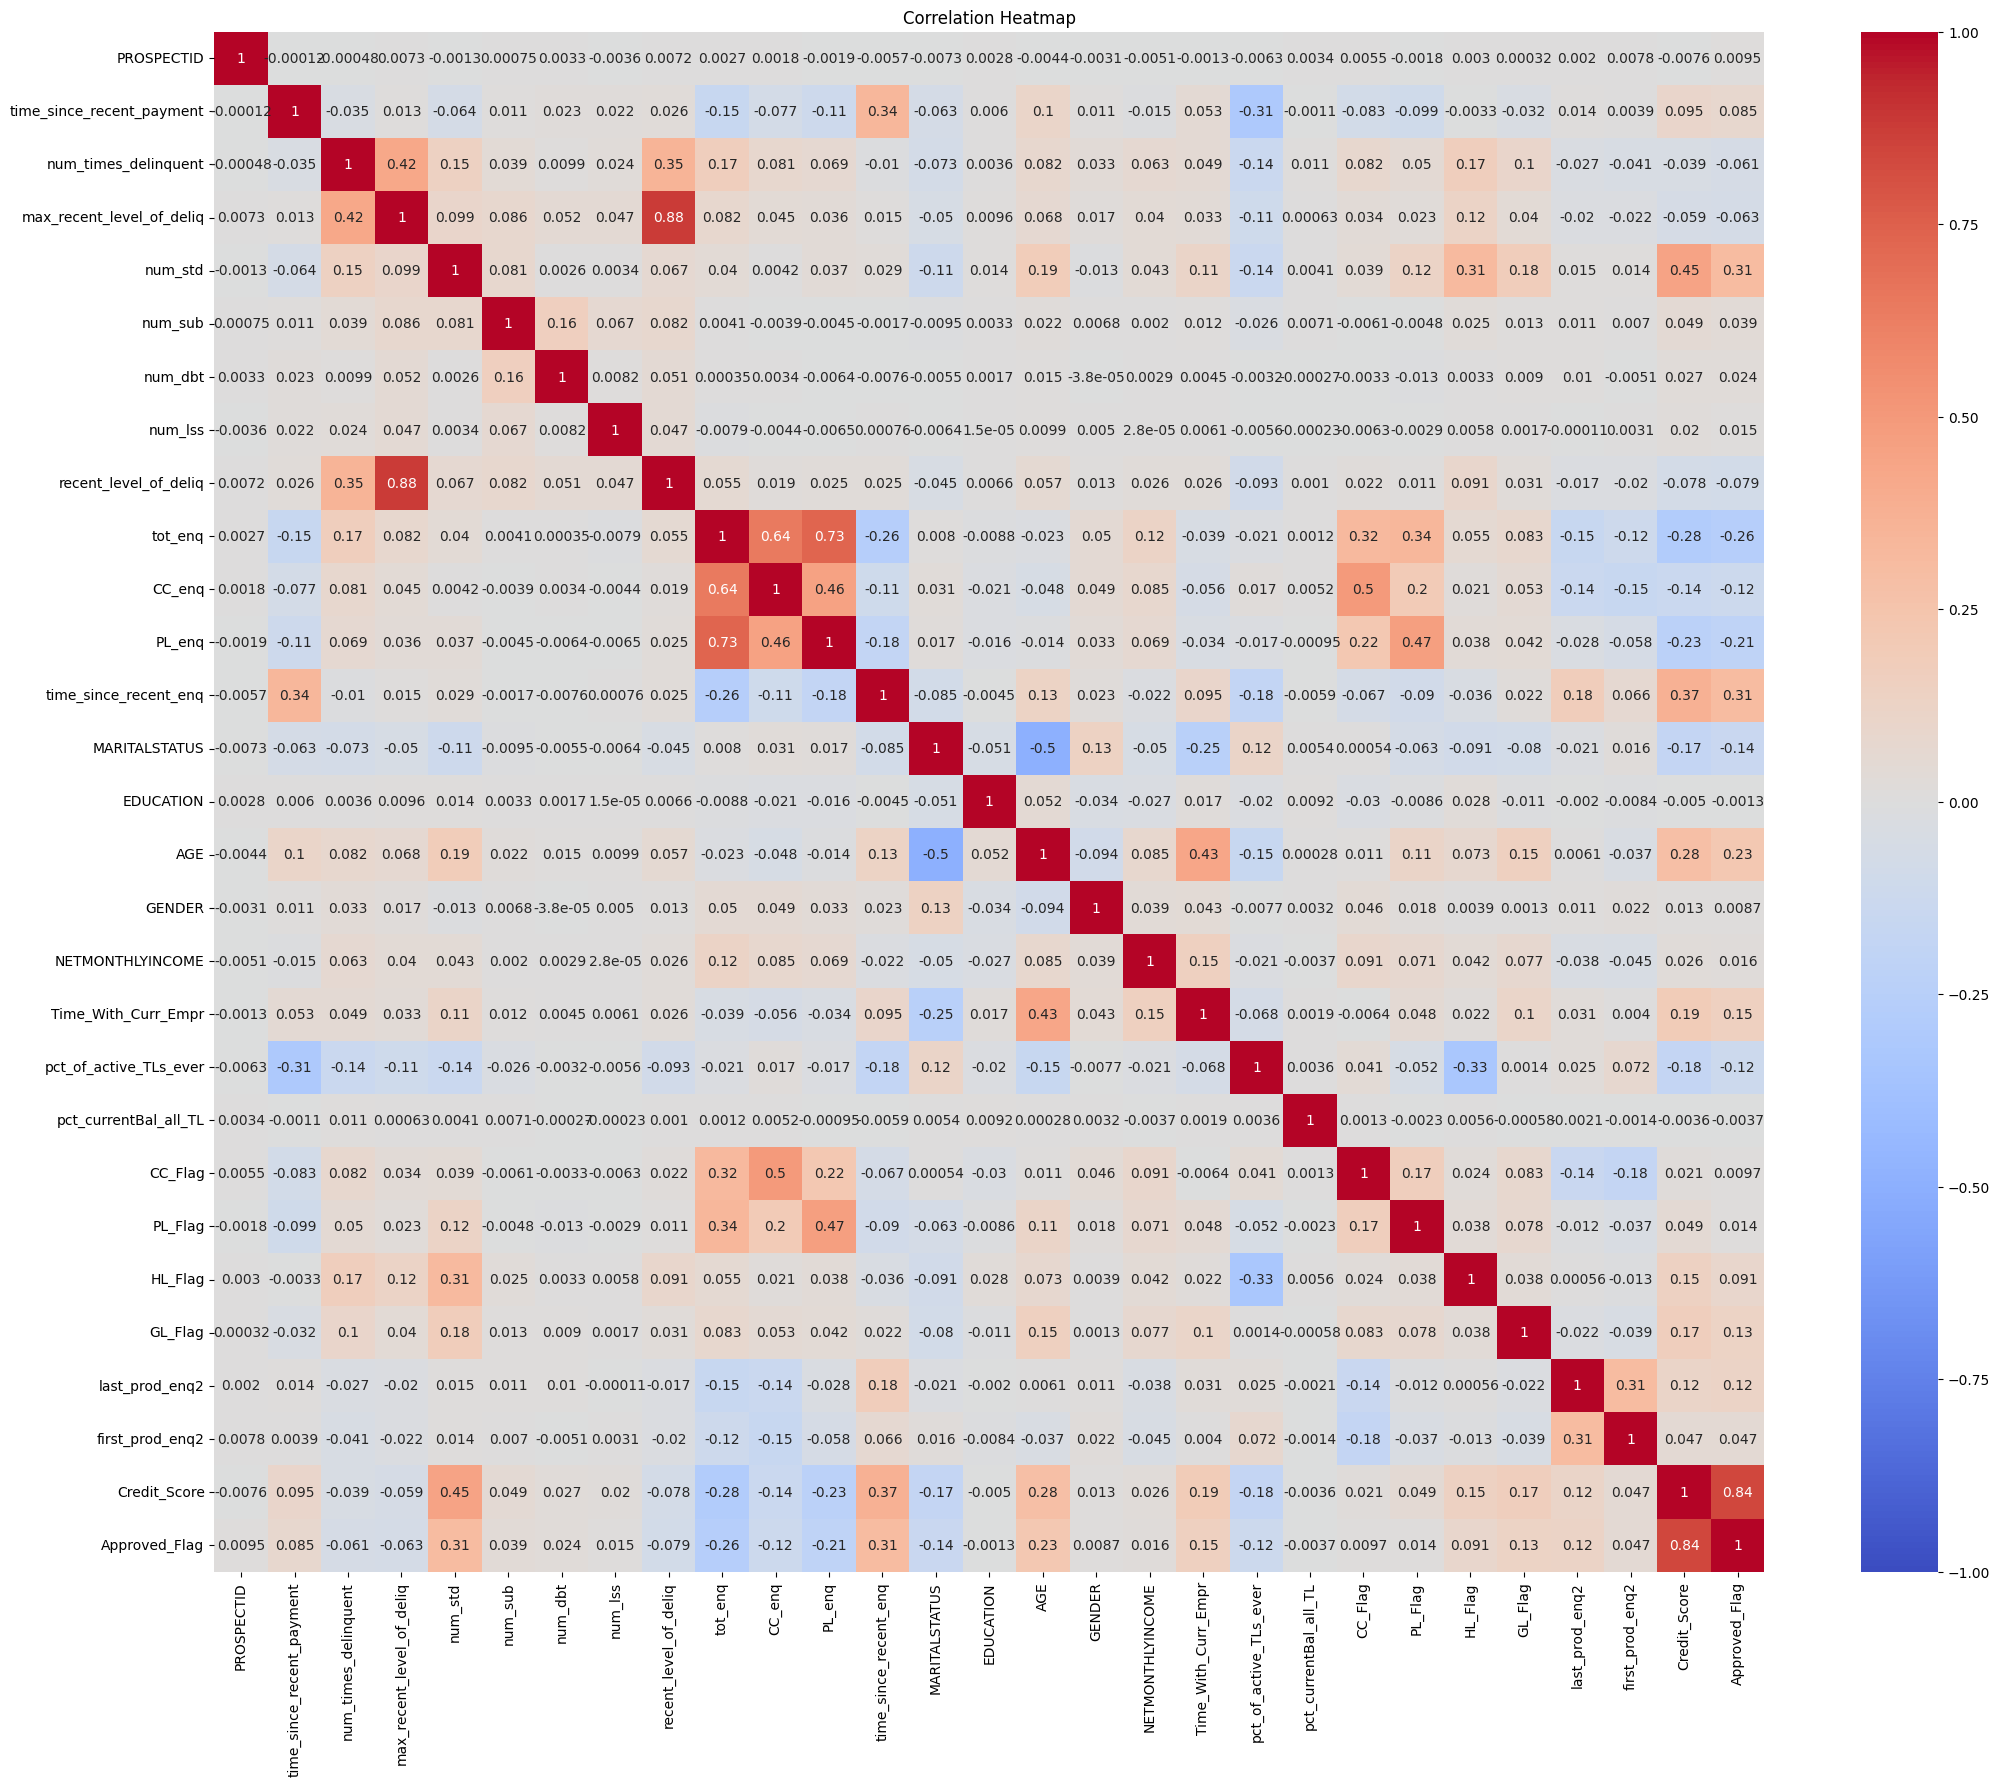

In [ ]:
plt.figure(figsize=(25, 20))
sns.heatmap(df_normalized.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_std,num_sub,num_dbt,num_lss,recent_level_of_deliq,tot_enq,...,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1.0,549.0,11.0,29.0,21.0,0.0,0.0,0.0,29.0,6.0,...,0.200,0.798,0.0,1.0,1.0,0.0,4,4,696.0,0.666667
1,2.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.000,0.370,0.0,0.0,0.0,0.0,2,2,685.0,0.666667
2,3.0,302.0,9.0,25.0,10.0,0.0,0.0,0.0,25.0,4.0,...,1.000,0.585,0.0,0.0,1.0,0.0,2,5,693.0,0.666667
4,5.0,583.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,1.0,...,0.333,0.000,0.0,0.0,0.0,0.0,0,0,753.0,1.000000
5,6.0,245.0,14.0,270.0,5.0,3.0,0.0,0.0,26.0,15.0,...,0.167,0.000,0.0,0.0,1.0,0.0,2,4,668.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332.0,15.0,2.0,24.0,0.0,0.0,0.0,0.0,24.0,4.0,...,1.000,0.230,0.0,0.0,0.0,0.0,2,2,650.0,0.000000
51332,51333.0,57.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,...,0.500,0.660,0.0,0.0,0.0,0.0,5,5,702.0,1.000000
51333,51334.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.500,0.428,0.0,0.0,0.0,0.0,2,5,661.0,0.333333
51334,51335.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.500,0.143,0.0,0.0,0.0,0.0,2,5,686.0,0.666667


In [ ]:
columns_to_process = [
    'time_since_recent_payment',
    'num_times_delinquent',
    'max_recent_level_of_deliq',
    'num_std',
    'num_sub',
    'num_dbt',
    'num_lss',
    'recent_level_of_deliq',
    'tot_enq',
    'CC_enq',
    'PL_enq',
    'time_since_recent_enq',
    'AGE',
    'NETMONTHLYINCOME',
    'Time_With_Curr_Empr',
    'pct_of_active_TLs_ever',
    'pct_currentBal_all_TL',
    'Credit_Score'
]

for col in columns_to_process:
    quartiles, bins = pd.qcut(
        df[col],
        q=4,
        labels=False,  # This will return 0, 1, 2, 3 (instead of 1, 2, 3, 4)
        retbins=True,  # This returns the bin edges as well
        duplicates='drop'
    )

    # Assign quartiles back to the DataFrame
    df[col] = quartiles + 1  # Shift to 1, 2, 3, 4 instead of 0, 1, 2, 3

    # Display the counts of each quartile
    print(df[col].value_counts())


time_since_recent_payment
1    10939
3    10512
4    10488
2    10127
Name: count, dtype: int64
num_times_delinquent
1    32160
2     9906
Name: count, dtype: int64
max_recent_level_of_deliq
1    31578
2    10488
Name: count, dtype: int64
num_std
1    31726
2    10340
Name: count, dtype: int64
num_sub
1    42066
Name: count, dtype: int64
num_dbt
1    42066
Name: count, dtype: int64
num_lss
1    42066
Name: count, dtype: int64
recent_level_of_deliq
1    31834
2    10232
Name: count, dtype: int64
tot_enq
1    15465
3    11971
4     8937
2     5693
Name: count, dtype: int64
CC_enq
1    42066
Name: count, dtype: int64
PL_enq
1    31884
2    10182
Name: count, dtype: int64
time_since_recent_enq
1    11007
3    10527
4    10498
2    10034
Name: count, dtype: int64
AGE
1    11884
4    10219
2    10026
3     9937
Name: count, dtype: int64
NETMONTHLYINCOME
1    12226
4    10486
3    10311
2     9043
Name: count, dtype: int64
Time_With_Curr_Empr
1    10735
3    10723
2    10338
4    10270
Name: 

In [ ]:
# import pandas as pd
# from google.colab import files
# csv_file = 'example.csv'
# df.to_csv(csv_file, index=False)

# # Download the CSV file
# files.download(csv_file)

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.9 MB/s eta 0:00:00


PC Algorithm

In [ ]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from pgmpy.estimators import PC

# # Create the PC algorithm object
# pc = PC(df)

# # Perform the PC algorithm to learn the skeleton and orientations
# # The method `estimate` returns a Bayesian Network model which contains the learned edges
# model = pc.estimate()

# # Convert the learned model to a NetworkX graph
# # Use DiGraph to handle directed edges
# G = nx.DiGraph()
# G.add_edges_from(model.edges())


In [ ]:
# !pip install pgmpy
# from pgmpy.estimators import PC
# from pgmpy.models import BayesianNetwork
# from pgmpy.estimators import HillClimbSearch, BicScore
# import pandas as pd



# # Define the scoring method
# scoring_method = BicScore(df)

# # Initialize the hill climbing search
# hc = HillClimbSearch(df, scoring_method)

# # Find the optimal Bayesian Network structure
# best_model = hc.estimate()

# # Print the edges of the best model
# print("Edges of the best model:", best_model.edges())

# # Visualize the network (optional, requires additional libraries)
# # import networkx as nx
# # import matplotlib.pyplot as plt
# # nx.draw(best_model, with_labels=True)
# # plt.show()


Hill Climbing Algorithm

In [ ]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

# Sample 5,000 rows from the DataFrame
df_sample = df.sample(n=30000, random_state=42).reset_index(drop=True)

# Discretize continuous columns (example: equal-width binning)
# Replace 'column_name' with your actual continuous columns
for column in df_sample.select_dtypes(include=['float', 'int']).columns:
    # Discretize the column into 5 bins
    df_sample[column] = pd.cut(df_sample[column], bins=5, labels=False)

# Initialize the Hill Climb search object with the discrete data
hc = HillClimbSearch(df_sample)

# Estimate the best model using Hill Climb search with BicScore
best_model = hc.estimate(scoring_method=BicScore(df_sample))

# Create the Bayesian Network
model = BayesianNetwork(best_model.edges())

# Print the edges of the Bayesian Network
print("Edges in the Bayesian Network:")
print(model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges in the Bayesian Network:
[('num_times_delinquent', 'tot_enq'), ('tot_enq', 'PL_enq'), ('tot_enq', 'first_prod_enq2'), ('tot_enq', 'CC_Flag'), ('tot_enq', 'NETMONTHLYINCOME'), ('max_recent_level_of_deliq', 'recent_level_of_deliq'), ('max_recent_level_of_deliq', 'num_times_delinquent'), ('max_recent_level_of_deliq', 'num_std'), ('max_recent_level_of_deliq', 'HL_Flag'), ('recent_level_of_deliq', 'Approved_Flag'), ('recent_level_of_deliq', 'num_times_delinquent'), ('recent_level_of_deliq', 'HL_Flag'), ('recent_level_of_deliq', 'Credit_Score'), ('num_std', 'HL_Flag'), ('num_std', 'pct_currentBal_all_TL'), ('num_std', 'GL_Flag'), ('HL_Flag', 'pct_of_active_TLs_ever'), ('HL_Flag', 'pct_currentBal_all_TL'), ('pct_currentBal_all_TL', 'time_since_recent_payment'), ('pct_currentBal_all_TL', 'GL_Flag'), ('Approved_Flag', 'Credit_Score'), ('Approved_Flag', 'tot_enq'), ('Credit_Score', 'num_std'), ('Credit_Score', 'PL_Flag'), ('Credit_Score', 'pct_of_active_TLs_ever'), ('Credit_Score', 'num_ti

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

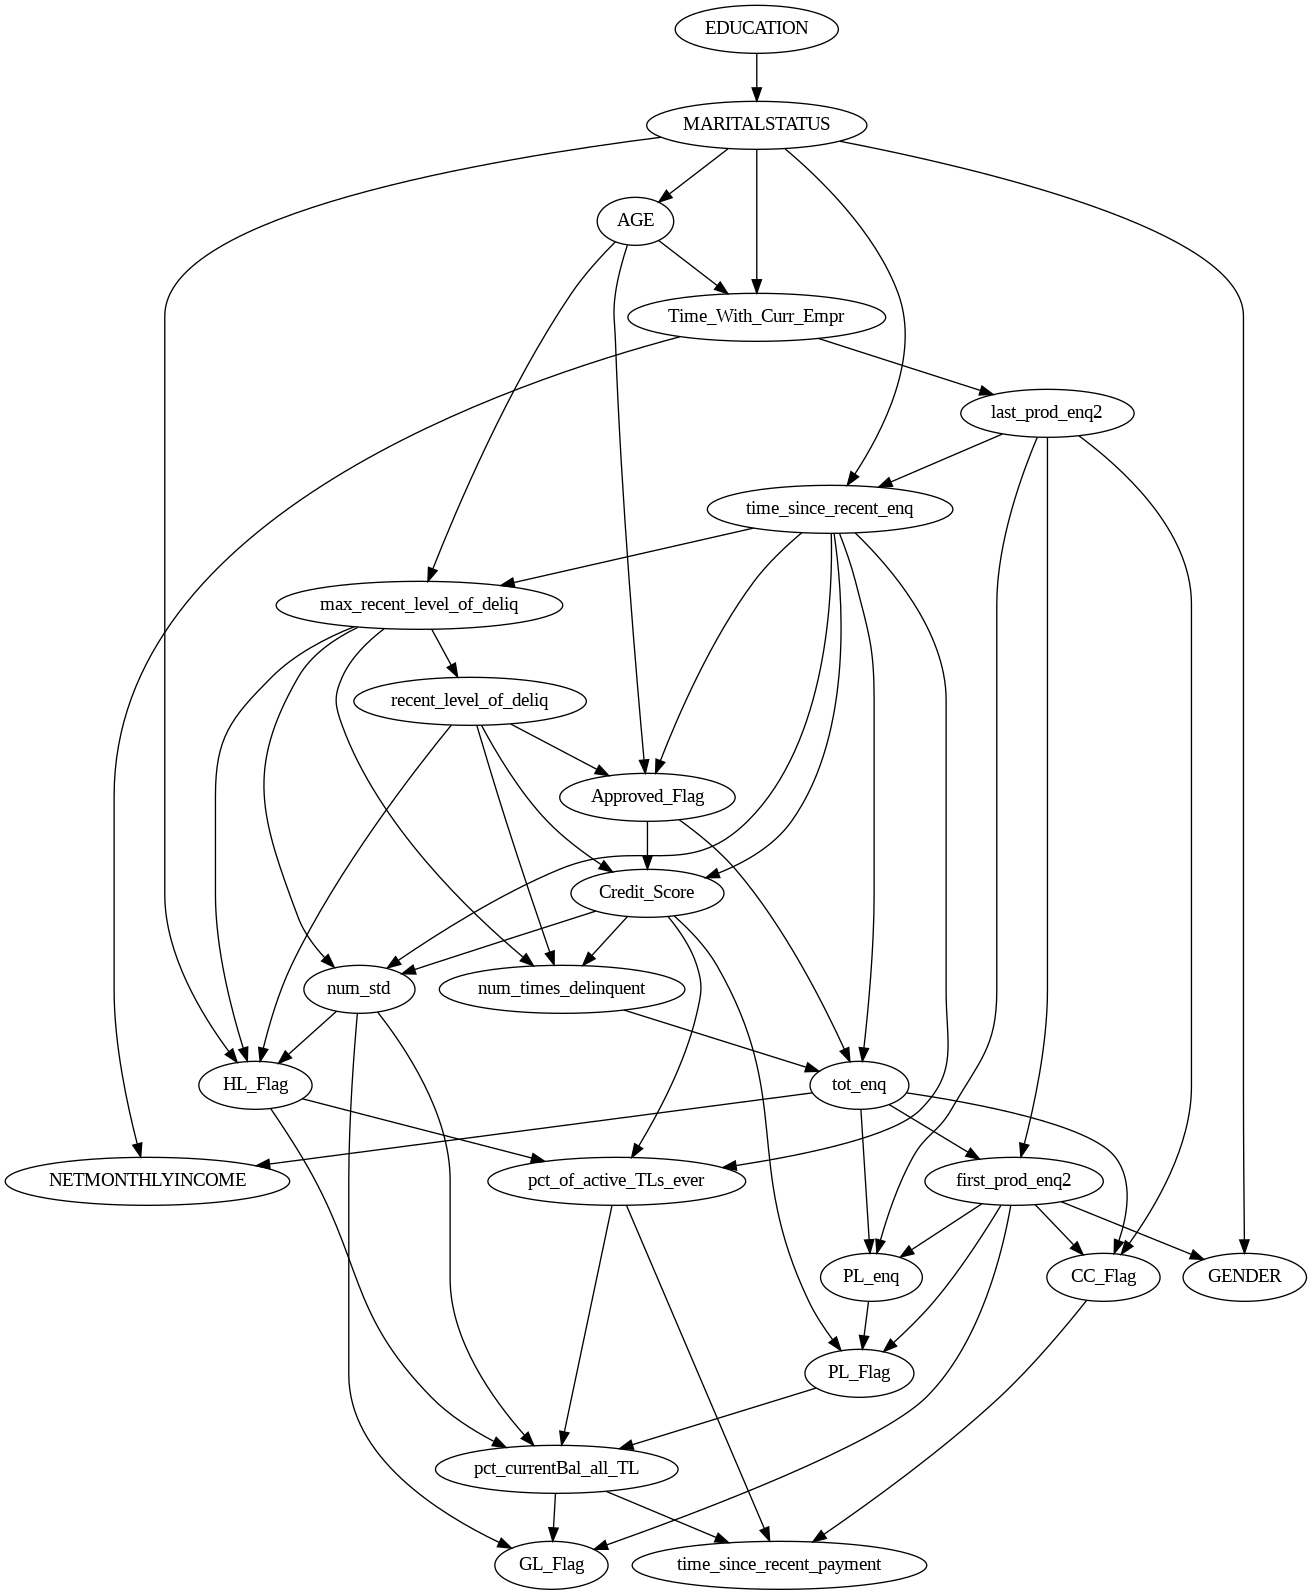

In [ ]:
from IPython.display import Image

display(Image((nx.drawing.nx_pydot.to_pydot(model)).create_png()))

FUTURE WORK...

In [ ]:
# import pandas as pd
# import numpy as np
# from pgmpy.models import BayesianNetwork
# from pgmpy.inference import VariableElimination
# from pgmpy.estimators import MaximumLikelihoodEstimator
# from sklearn.metrics import confusion_matrix, classification_report

# # Load your datasets
# df1 = pd.read_csv('/content/final_dataset.csv')  # Update the path as necessary
# df2 = pd.read_csv('/content/final_dataset.csv')

# num_rows = len(df1)
# half_index = 35000

# # Step 3: Drop the first half of the rows
# train_data = df1.head(50).reset_index(drop=True)
# test_data = df2.tail(50).reset_index(drop=True)

# # print(test_data)

# train_data['Approved_Flag'] = pd.Categorical(train_data['Approved_Flag'], categories=['P1', 'P2', 'P3', 'P4'])
# test_data['Approved_Flag'] = pd.Categorical(test_data['Approved_Flag'], categories=['P1', 'P2', 'P3', 'P4'])


# model = BayesianNetwork([
#     ('num_times_delinquent', 'tot_enq'), ('tot_enq', 'PL_enq'), ('tot_enq', 'first_prod_enq2'), ('tot_enq', 'CC_Flag'), ('tot_enq', 'NETMONTHLYINCOME'), ('max_recent_level_of_deliq', 'recent_level_of_deliq'), ('max_recent_level_of_deliq', 'num_times_delinquent'), ('max_recent_level_of_deliq', 'num_std'), ('max_recent_level_of_deliq', 'HL_Flag'), ('recent_level_of_deliq', 'Approved_Flag'), ('recent_level_of_deliq', 'num_times_delinquent'), ('recent_level_of_deliq', 'HL_Flag'), ('recent_level_of_deliq', 'Credit_Score'), ('num_std', 'HL_Flag'), ('num_std', 'pct_currentBal_all_TL'), ('num_std', 'GL_Flag'), ('HL_Flag', 'pct_of_active_TLs_ever'), ('HL_Flag', 'pct_currentBal_all_TL'), ('pct_currentBal_all_TL', 'time_since_recent_payment'), ('pct_currentBal_all_TL', 'GL_Flag'), ('Approved_Flag', 'Credit_Score'), ('Approved_Flag', 'tot_enq'), ('Credit_Score', 'num_std'), ('Credit_Score', 'PL_Flag'), ('Credit_Score', 'pct_of_active_TLs_ever'), ('Credit_Score', 'num_times_delinquent'), ('PL_enq', 'PL_Flag'), ('first_prod_enq2', 'CC_Flag'), ('first_prod_enq2', 'GL_Flag'), ('first_prod_enq2', 'PL_enq'), ('first_prod_enq2', 'PL_Flag'), ('first_prod_enq2', 'GENDER'), ('CC_Flag', 'time_since_recent_payment'), ('PL_Flag', 'pct_currentBal_all_TL'), ('time_since_recent_enq', 'tot_enq'), ('time_since_recent_enq', 'Approved_Flag'), ('time_since_recent_enq', 'Credit_Score'), ('time_since_recent_enq', 'pct_of_active_TLs_ever'), ('time_since_recent_enq', 'num_std'), ('time_since_recent_enq', 'max_recent_level_of_deliq'), ('pct_of_active_TLs_ever', 'pct_currentBal_all_TL'), ('pct_of_active_TLs_ever', 'time_since_recent_payment'), ('MARITALSTATUS', 'AGE'), ('MARITALSTATUS', 'GENDER'), ('MARITALSTATUS', 'Time_With_Curr_Empr'), ('MARITALSTATUS', 'time_since_recent_enq'), ('MARITALSTATUS', 'HL_Flag'), ('AGE', 'Time_With_Curr_Empr'), ('AGE', 'Approved_Flag'), ('AGE', 'max_recent_level_of_deliq'), ('Time_With_Curr_Empr', 'NETMONTHLYINCOME'), ('Time_With_Curr_Empr', 'last_prod_enq2'), ('EDUCATION', 'MARITALSTATUS'), ('last_prod_enq2', 'time_since_recent_enq'), ('last_prod_enq2', 'first_prod_enq2'), ('last_prod_enq2', 'PL_enq'), ('last_prod_enq2', 'CC_Flag')
# ])

# # Fit the model to the training data
# model.fit(train_data, estimator=MaximumLikelihoodEstimator)

# # Create an inference object
# inference = VariableElimination(model)

# # Perform inference on the test data
# predictions = []
# model_nodes = model.nodes()
# for _, row in test_data.iterrows():
#     # Prepare evidence by filtering out nodes not present in the model
#     evidence = {col: row[col] for col in row.index if col not in ['Approved_Flag', 'PROSPECTID']}

#     # Predict the value of 'Approved_Flag' based on the current row
#     prediction = inference.map_query(variables=['Approved_Flag'], evidence=evidence)
#     predictions.append(prediction['Approved_Flag'])
# # Convert predictions to a DataFrame
# predictions = pd.Series(predictions, name='Predicted_Flag')

# # Create a performance matrix
# conf_matrix = confusion_matrix(test_data['Approved_Flag'], predictions)
# class_report = classification_report(test_data['Approved_Flag'], predictions)

# # Output the confusion matrix and classification report
# print("Confusion Matrix:")
# print(conf_matrix)
# print("\nClassification Report:")
# print(class_report)